## Step 1: Data Pre-Processing

In [1]:
# Importing libraries
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import confusion_matrix
from matplotlib.colors       import ListedColormap

# Importing dataset
dataset = pd.read_csv('user_data.csv')


In [2]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# Extracting Independent and dependent Variable
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature Scaling
sc      = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

## Step 2: Fitting the K-NN algorithm to the Training set

In [4]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)


KNeighborsClassifier()

## Step 3: Predicting the test result

In [5]:
# Predicting the test set result
y_pred = classifier.predict(X_test)


## Step 4: Creating the Confusion Matrix

In [6]:
# Creating the Confusion matrix
# from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[64  4]
 [ 3 29]]


## Step 5: Visualizing the Training set result

/var/folders/1b/r7bj9kwn3wbf8n_h5chpmjjr0000gn/T/ipykernel_12098/2241558228.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == label, 0],


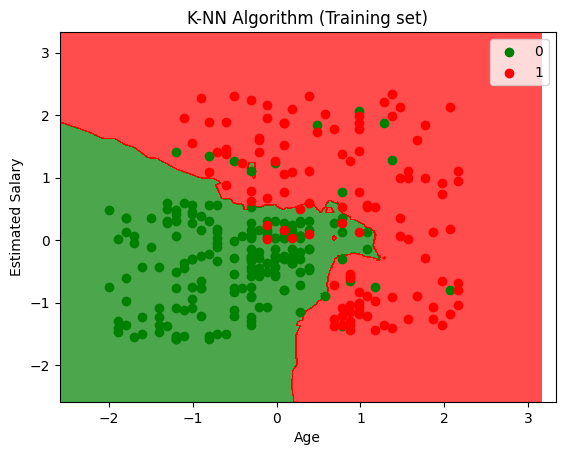

/var/folders/1b/r7bj9kwn3wbf8n_h5chpmjjr0000gn/T/ipykernel_12098/2241558228.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == label, 0],


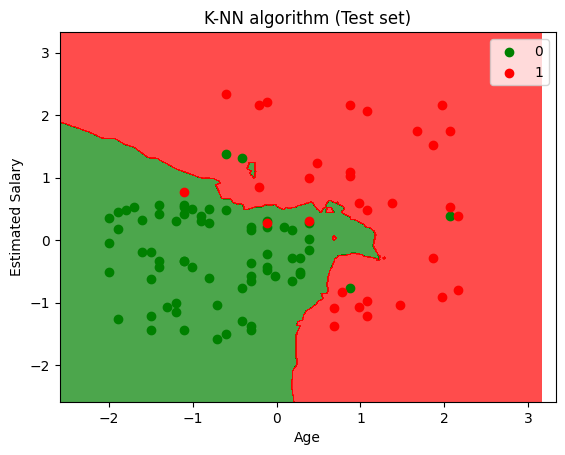

In [11]:
def visualize_result(x_set, y_set, title, x_label, y_label,  legend_labels):

    x1, x2 = np.meshgrid(
                    np.arange(start = x_set[:,0].min()-1, stop = x_set[:,0].max()+1, step=0.01),
                    np.arange(start = x_set[:,1].min()-1, stop = x_set[:,1].max()+1, step=0.01))

    colors = ListedColormap(['green', 'red', 'grey'])
    colors = ListedColormap(['green', 'red'])

    # scaling graph
    plt.xlim(x1.min(), x1.max())
    plt.xlim(x2.min(), x2.max())
    
    
    # background color -- tour
    plt.contourf(x1, x2,
                 classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
                 alpha=0.7,
                 cmap = colors)

    
    # plotting points -- independent of x1, x2 -- plotting points (x,y) == x_set[y_set == label, 0]
    for i, label in enumerate(np.unique(y_set)):
        plt.scatter(x_set[y_set == label, 0],
                    x_set[y_set == label, 1],
                    c = colors(i),
                    label = str(label))

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(legend_labels)
    plt.show()

# Usage for Step 5
visualize_result(X_train, y_train, 'K-NN Algorithm (Training set)', 'Age', 'Estimated Salary', legend_labels=['0', '1', '2'])

# Usage for Step 6
visualize_result(X_test, y_test, 'K-NN algorithm (Test set)', 'Age', 'Estimated Salary', legend_labels=['0', '1', '2'])
